# **Matplotlib OHLC Example**
- **[Basics of OHLC charts with Python’s Matplotlib](https://towardsdatascience.com/basics-of-ohlc-charts-with-pythons-matplotlib-56d0e745a5be)**
- **[mpl_finance 라이브러리 최신변경 및 신규모듈 추상화로 어렵다](https://github.com/matplotlib/mplfinance)**

## **1 Loading the DataSet**
데이터 불러오기

In [1]:
import os
import pandas as pd
file_save = "stock/boillinger.csv"
data_df = pd.read_csv(file_save)
data_df['Date'] = pd.to_datetime(data_df['Date']) # datetime 포맷 변경
data_df.columns = [_.lower() for _ in data_df.columns]
# data_df = data_df.set_index('date')
data_df.tail(3)

,date,open,high,low,close,volume,change
577,2021-05-04,366000,367000,360500,364500,398383,0.004132
578,2021-05-06,360500,364500,359500,361500,632873,-0.008230
579,2021-05-07,360500,364000,360000,361000,444578,-0.001383


# **Matplotlib 을 활용한 그래프 그리기**
**Initialization** matplotlib 초기화 설정

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Loading ... Visualization Modules
import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)

from matplotlib.font_manager import fontManager as fm # 한글폰트 확인 및 추가
font_list_check  = ['D2Coding', 'NanumGothicCoding', 'NanumGothic']
for _ in font_list_check:
    font_counts = [f  for f in font_list_check if _ in [_.name for _ in fm.ttflist]]
    if len(font_counts) > 1: print(f"found : {_}"); plt.rc('font', family=_); break 

found : D2Coding


In [3]:
# Plotlib 에서 활용하는 Pandas 메서드
# .iterrows() : index 순서대로 Series 순차로 출력
df = data_df.iloc[-100:,:].reset_index(drop=True).copy()
# df = data_df.copy()
for idx, val in df.iloc[:2,:2].iterrows(): 
    print(f"{idx}, {type(val)}, \n{val} \n")

0, <class 'pandas.core.series.Series'>, 
date    2020-12-10 00:00:00
open                 288000
Name: 0, dtype: object 

1, <class 'pandas.core.series.Series'>, 
date    2020-12-11 00:00:00
open                 288000
Name: 1, dtype: object 



## **1 Candle Line | OHLC Chart**
matplotlib 를 활용하여 그리기

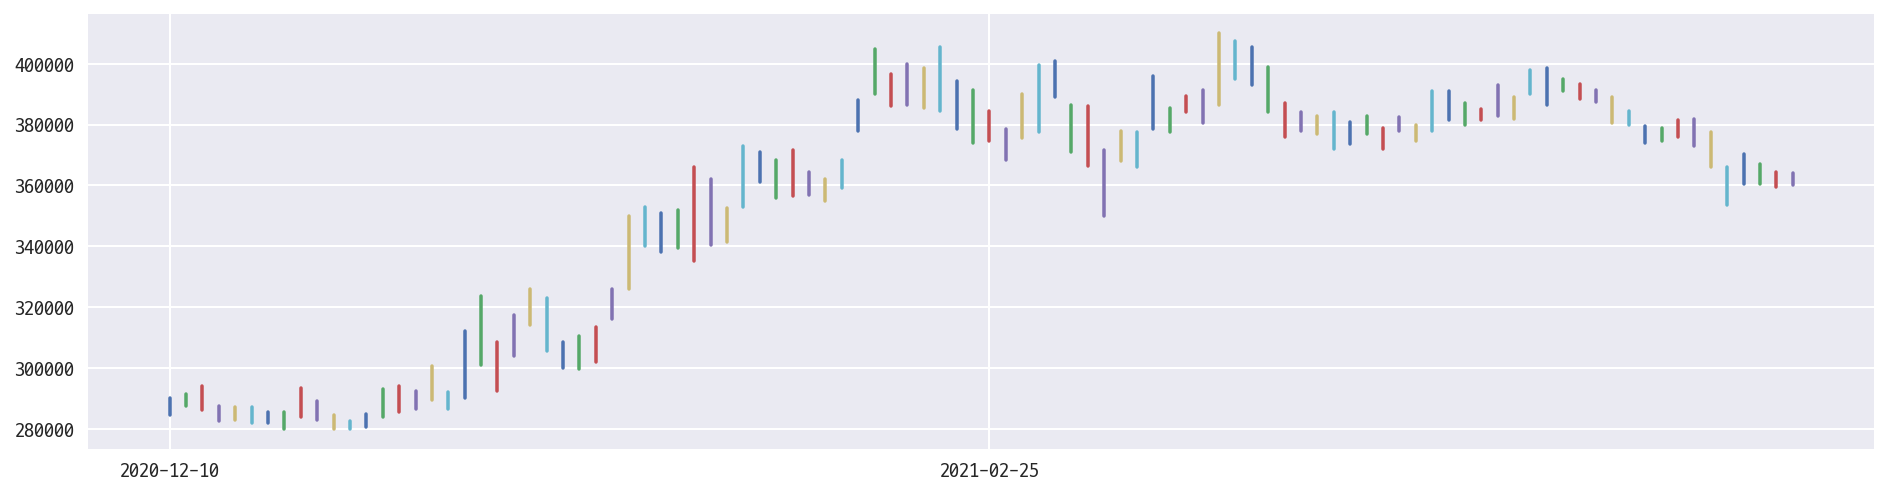

In [4]:
import numpy as np
x = np.arange(0, len(df))
fig, ax = plt.subplots(1, figsize=(16,4))
for idx, val in df.iterrows():
    plt.plot([x[idx], x[idx]], [val['low'], val['high']])
    
plt.xticks(x[::50], df.date.dt.date[::50])
plt.show()

## **2 Candle Stick | OHLC Chart**
matplotlib 를 활용하여 그리기

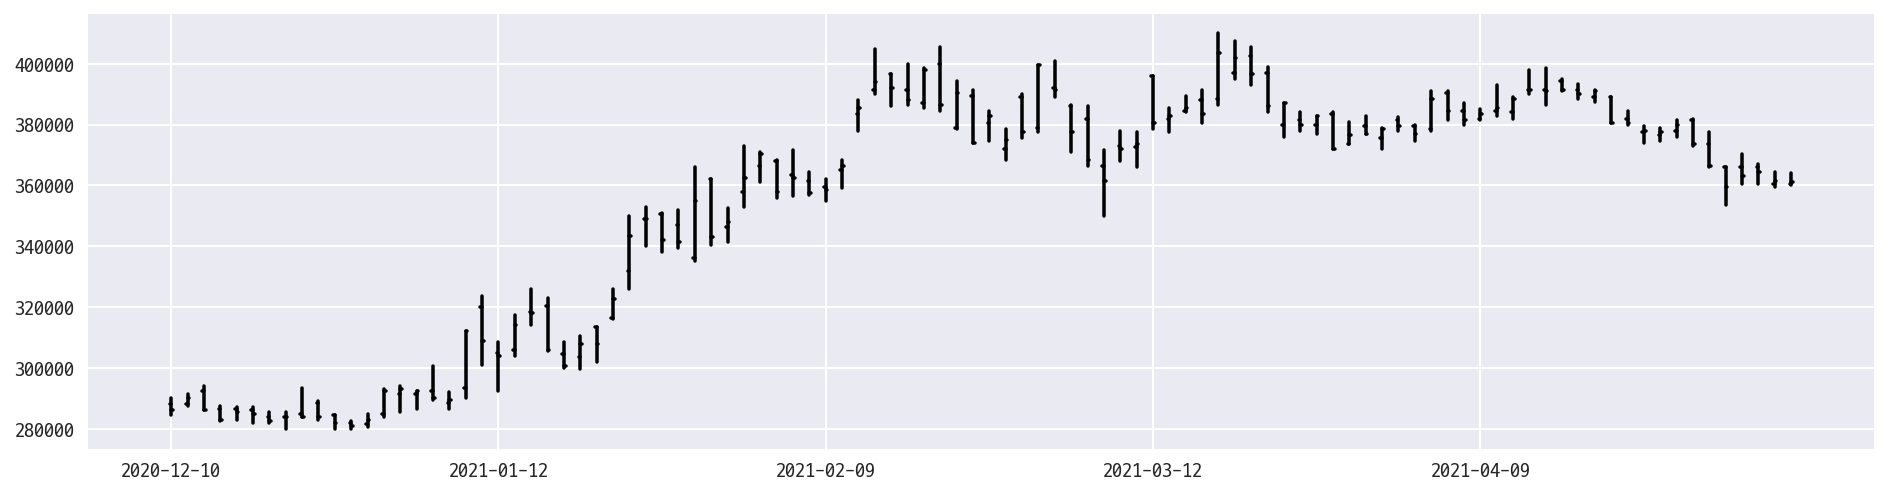

In [5]:
x = np.arange(0, len(df))
fix, ax = plt.subplots(1, figsize=(16,4))

for _, val in df.iterrows():
    plt.plot([ x[_], x[_]], [val['low'], val['high']], color="black") # High, Low Marker
    plt.plot([ x[_], x[_]-.1], [val['open'], val['open']], color="black") # Open Marker
    plt.plot([ x[_], x[_]+.1], [val['close'], val['close']], color="black") # close Marker
    
plt.xticks(x[::20], df.date.dt.date[::20])
plt.show()

## **3 Candle Stick in Color | OHLC Chart**
matplotlib 를 활용하여 그리기

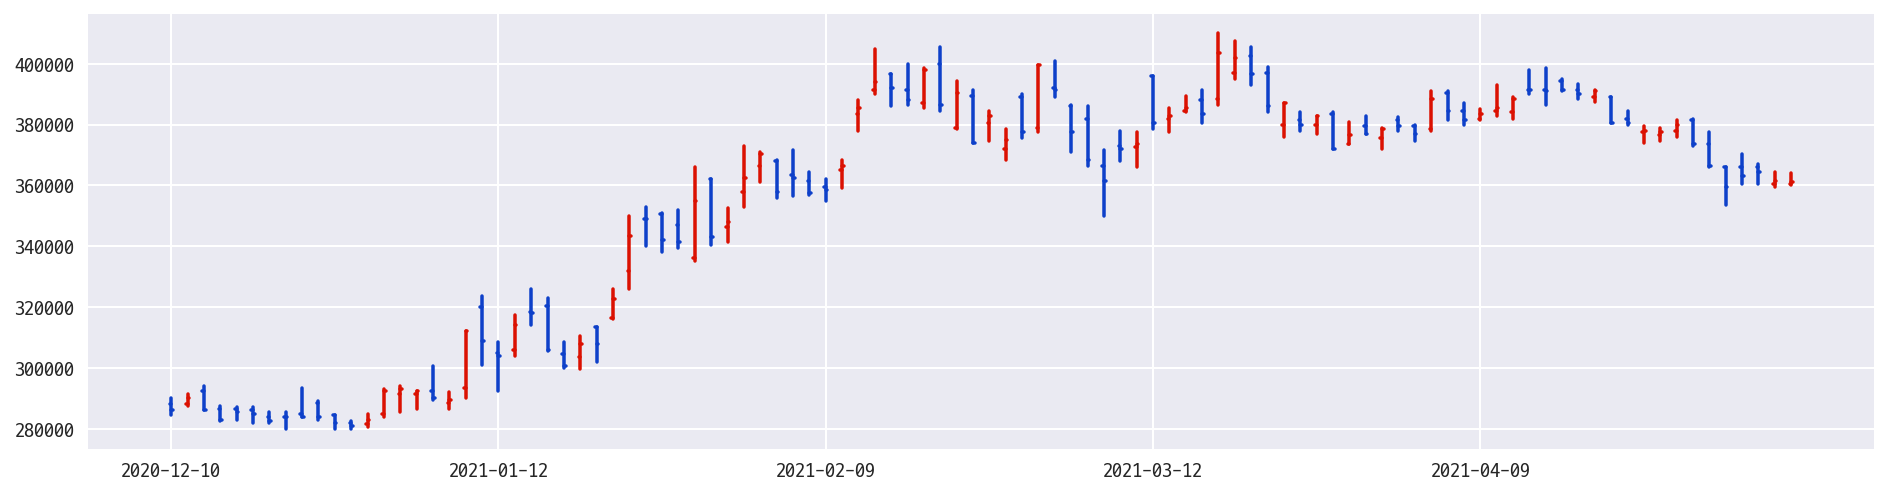

In [6]:
x = np.arange(0, len(df))
fix, ax = plt.subplots(1, figsize=(16,4))

for _, val in df.iterrows():
    if val['close'] > val['open']: color = "#db1102" # 종가 상승
    else: color = "#0e40c9"                          # 종가 하락
    plt.plot([ x[_], x[_]], [val['low'], val['high']], color=color)     # High, Low Marker
    plt.plot([ x[_], x[_]-.1], [val['open'], val['open']], color=color) # Open Marker
    plt.plot([ x[_], x[_]+.1], [val['close'], val['close']], color=color) # close Marker
    
plt.xticks(x[::20], df.date.dt.date[::20])
plt.show()

## **4 Candle Stick in Color 2 | OHLC Chart**
matplotlib 를 활용하여 그리기 **Adding the Chart Style**

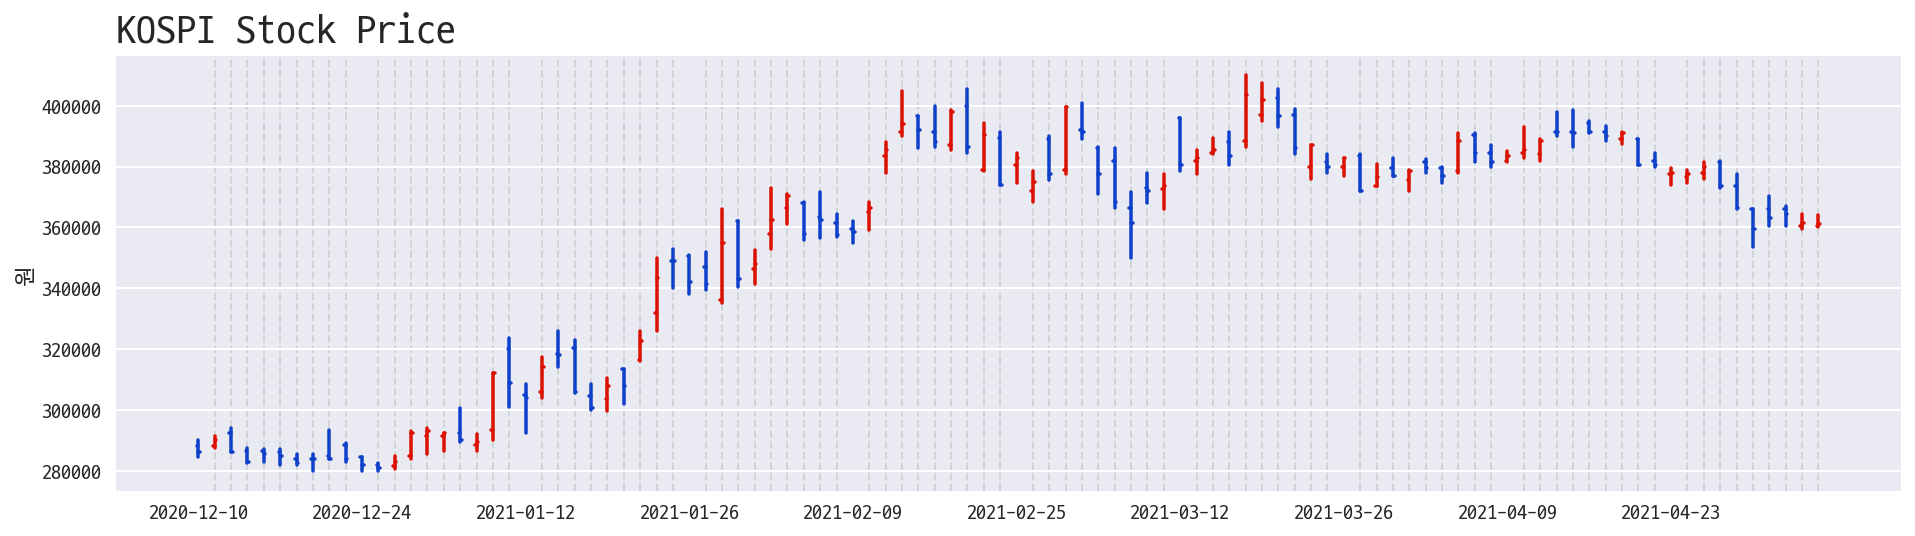

In [7]:
x = np.arange(0, len(df))
fix, ax = plt.subplots(1, figsize=(16,4))

for _, val in df.iterrows():
    if val['close'] > val['open']: color = "#db1102" # 종가 상승
    else: color = "#0e40c9"                          # 종가 하락
    plt.plot([ x[_], x[_]], [val['low'], val['high']], color=color)     # High, Low Marker
    plt.plot([ x[_], x[_]-.1], [val['open'], val['open']], color=color) # Open Marker
    plt.plot([ x[_], x[_]+.1], [val['close'], val['close']], color=color) # close Marker
    
plt.xticks(x[::10], df.date.dt.date[::10]) # X-axis : datetime ticks
ax.set_xticks(x, minor=True)
plt.ylabel('원')  # labels
ax.xaxis.grid(color='black', linestyle='dashed', which='both', alpha=.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('KOSPI Stock Price', loc="left", fontsize=20)
plt.show()

## **4 Candle Chart | Customizing**
volume 데이터 테이블 추가하기

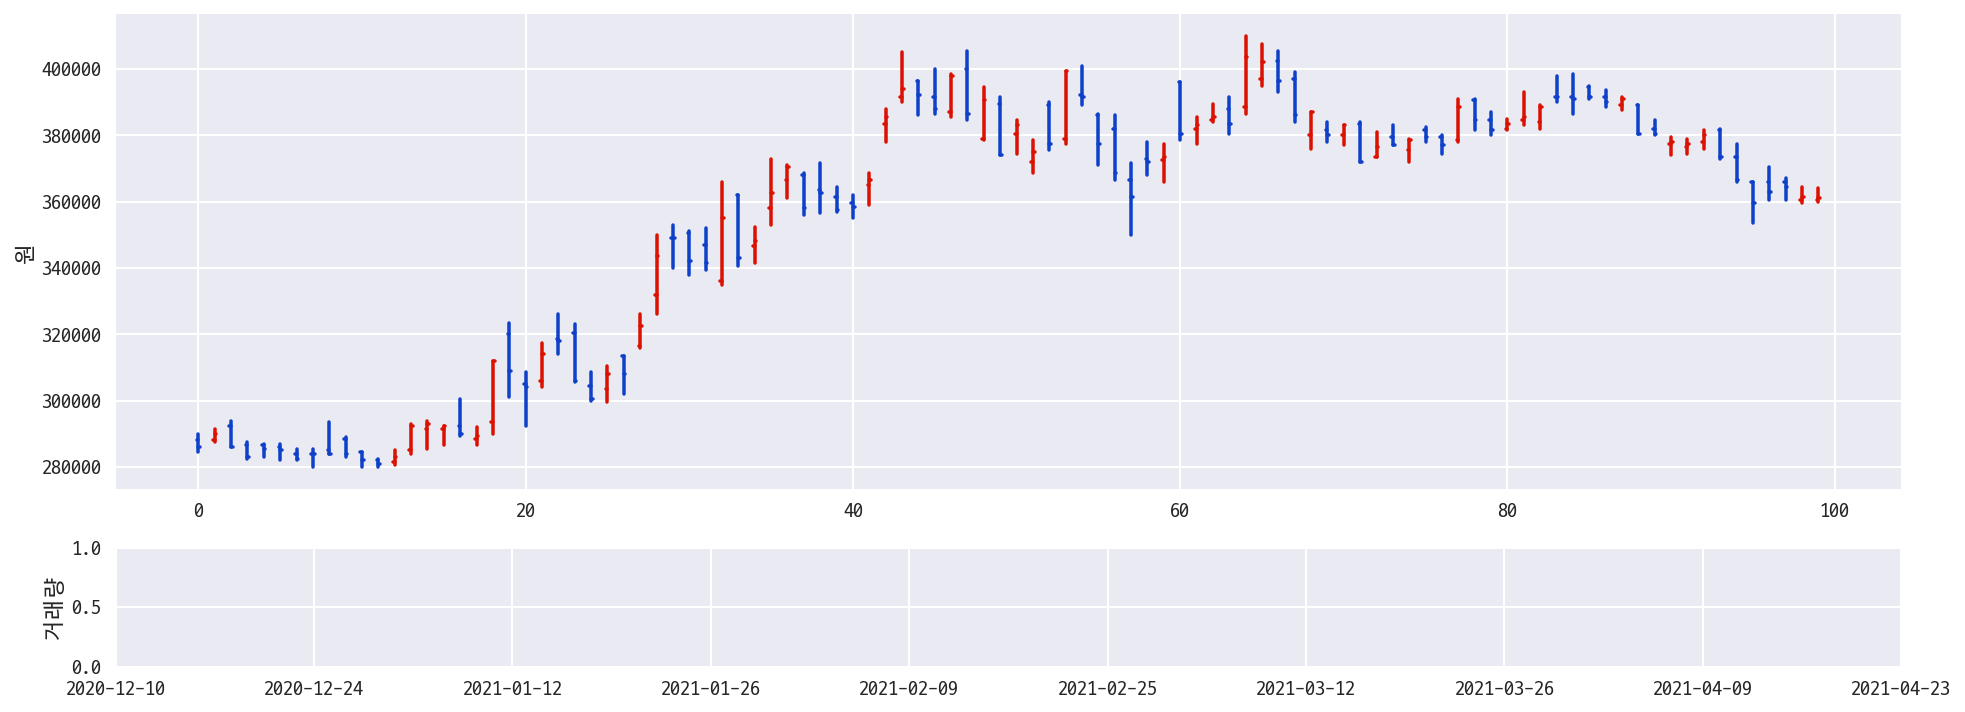

In [8]:
x = np.arange(0, len(df))
fix, (ax1, ax2) = plt.subplots(2, figsize=(16,6), gridspec_kw={'height_ratios':[4,1]})

for _, val in df.iterrows():
    if val['close'] > val['open']: color = "#db1102" # 종가 상승
    else: color = "#0e40c9"                          # 종가 하락
    ax1.plot([ x[_], x[_]], [val['low'], val['high']], color=color)     # High, Low Marker
    ax1.plot([ x[_], x[_]-.1], [val['open'], val['open']], color=color) # Open Marker
    ax1.plot([ x[_], x[_]+.1], [val['close'], val['close']], color=color) # close Marker

# ticks top plot
ax2.set_xticks(x[::10])
ax2.set_xticklabels(df.date.dt.date[::10]) # X-axis : datetime ticks
ax1.set_xticks(x, minor=True)

# labels
ax1.set_ylabel('원')
ax2.set_ylabel('거래량')
# ax1.xaxis.grid(color='black', linestyle='dashed', which)
plt.show()